In [77]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.cluster import KMeans, OPTICS
from sklearn import metrics

In [8]:
engajamento = pd.read_csv("Data/Engajamento.csv")

In [9]:
x =  engajamento.iloc[:,:-1]

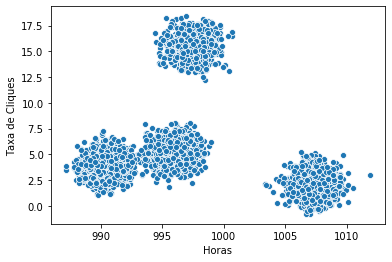

In [11]:
sns.scatterplot(x='Horas',y='Taxa de Cliques', data=x)

In [13]:
#Usando o metodo K means

In [34]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [35]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [36]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

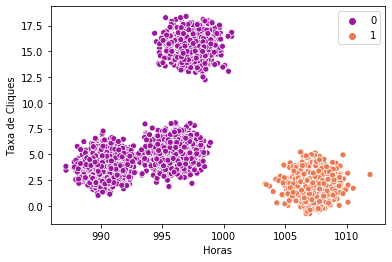

In [38]:
sns.scatterplot(x='Horas',y='Taxa de Cliques', data=x, hue=kmeans.labels_,palette='plasma')

In [24]:
kmeans2 = KMeans(n_clusters=4, random_state=0)

In [25]:
kmeans2.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

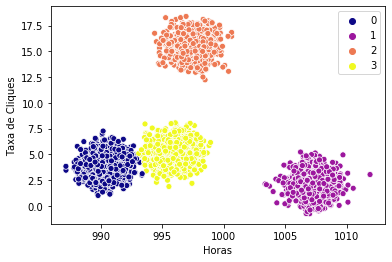

In [31]:
sns.scatterplot(x='Horas',y='Taxa de Cliques', data=x, hue=kmeans2.labels_,palette='plasma')

In [39]:
#Usando algoritimo optics

In [51]:
clustering_o = OPTICS(min_samples=800).fit(x)

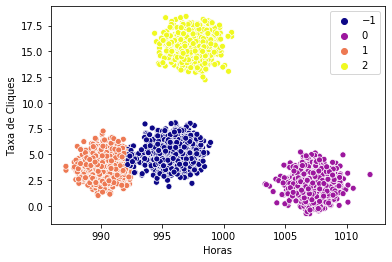

In [52]:
sns.scatterplot(x='Horas',y='Taxa de Cliques', data=x, hue=clustering_o.labels_,palette='plasma')

In [58]:
#Clusterização das classes classe
classes_por_hora = engajamento.drop(columns=['Taxa de Cliques'])

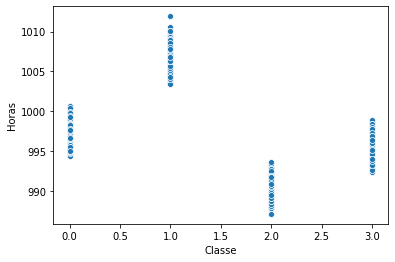

In [88]:
sns.scatterplot(y='Horas',x='Classe', data=classes_por_hora)

In [70]:
kmeans_classe = KMeans(n_clusters=4, random_state=0)

In [71]:
kmeans_classe.fit(classes_por_hora)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

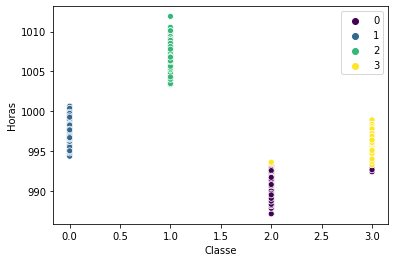

In [87]:
sns.scatterplot(y='Horas',x='Classe', data=classes_por_hora, hue=kmeans_classe.labels_,palette='viridis')

In [73]:
clustering_classe_o = OPTICS(min_samples=800).fit(classes_por_hora)

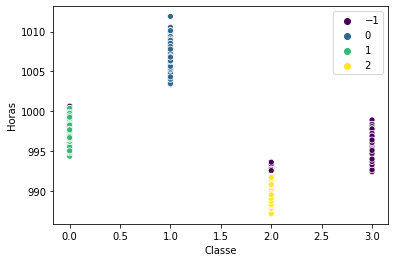

In [86]:
sns.scatterplot(y='Horas',x='Classe', data=classes_por_hora, hue=clustering_classe_o.labels_,palette='viridis')

In [75]:
# Verificação de agrupamento

In [80]:
Classe_conhecida = engajamento['Classe']
Classe_estimada = clustering_o.labels_
Classe_estimadak = kmeans2.labels_

In [79]:
metrics.adjusted_rand_score(Classe_conhecida, Classe_estimada)

0.9821047486293407

In [81]:
metrics.adjusted_rand_score(Classe_conhecida, Classe_estimadak)

0.9957444328155858

In [83]:
metrics.silhouette_score(x, Classe_estimadak, metric='euclidean')

0.7640009351490763

In [85]:
metrics.silhouette_score(x, Classe_estimada ,metric='euclidean')

0.7590075270703337